## Day 24 Lecture 1 Assignment

In this assignment, we will build our first logistic regression model on numeric data. We will use the FIFA soccer ratings dataset loaded below and analyze the model generated for this dataset.

In [109]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [110]:
def remove_correlated_features(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    print(f'Deleted {colname} from dataset.')
                    del dataset[colname]

    return dataset

In [111]:
soccer_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv')

In [112]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,...,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,...,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,...,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,...,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,...,80,54,41,87,89,86,91,34,27,22


Our response for our logistic regression model is going to be a binary label, "Elite" or "Not Elite", corresponding to whether or not the player has an overall rating greater than or equal to 75. This corresponds to the top 10% or so of soccer players in the data set. Create the response column.

In [130]:
# answer goes here

soccer_data['Level'] = np.where(soccer_data['Overall'] >= 75, 'Elite', 'Not Elite')
soccer_data

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Level
0,158023,L. Messi,94,84,95,70,90,86,97,93,...,59,94,48,22,94,94,75,96,33,Elite
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,...,79,93,63,29,95,82,85,95,28,Elite
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,...,49,82,56,36,89,87,81,94,27,Elite
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,...,75,91,76,61,87,94,79,88,68,Elite
4,183277,E. Hazard,91,81,84,61,89,80,95,83,...,66,80,54,41,87,89,86,91,34,Elite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,238813,J. Lundstram,47,34,38,40,49,25,42,30,...,47,38,46,46,39,52,43,45,40,Not Elite
16118,243165,N. Christoffersson,47,23,52,52,43,36,39,32,...,67,42,47,16,46,33,43,42,22,Not Elite
16119,241638,B. Worman,47,25,40,46,38,38,45,38,...,32,45,32,15,48,43,55,41,32,Not Elite
16120,246268,D. Walker-Rice,47,44,50,39,42,40,51,34,...,48,34,33,22,44,47,50,46,20,Not Elite


Address potential collinearity issues by removing the appropriate features. There is no universally agreed upon technique for doing so, so feel free to use any reasonable method. We have provided the convenience function *remove_correlated_features* at the top as one way of doing so, and we use a threshold of 0.9 for that function to reduce correlation among features.

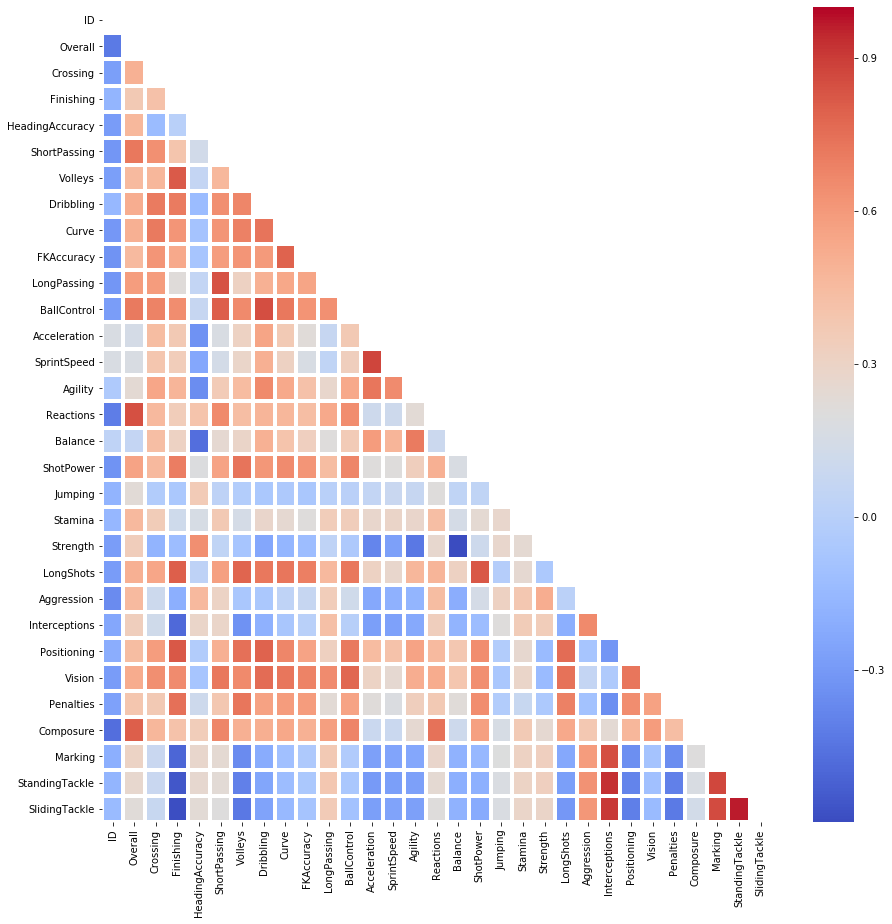

In [114]:
# answer goes here

# To visualize collinearity, we'll plot a heatmap
plt.figure(figsize=[15, 15])
corr = soccer_data.select_dtypes('number').corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, annot=False, linewidths=3, cmap='coolwarm')
plt.show()

In [115]:
# Then we'll programmatically identify out of the feature variables which pairs may be collinear, and finally drop those.

removed_df = remove_correlated_features(soccer_data, .9)
soccer_data = removed_df

Deleted StandingTackle from dataset.
Deleted SlidingTackle from dataset.


Split the data into train and test, with 80% training and 20% testing. Be sure to leave out columns that would not make sense in the model, like the player ID column.

In [123]:
print(soccer_data.columns)
drop_cols = ['ID', 'Name', 'Level']

Index(['ID', 'Name', 'Overall', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'Level'],
      dtype='object')


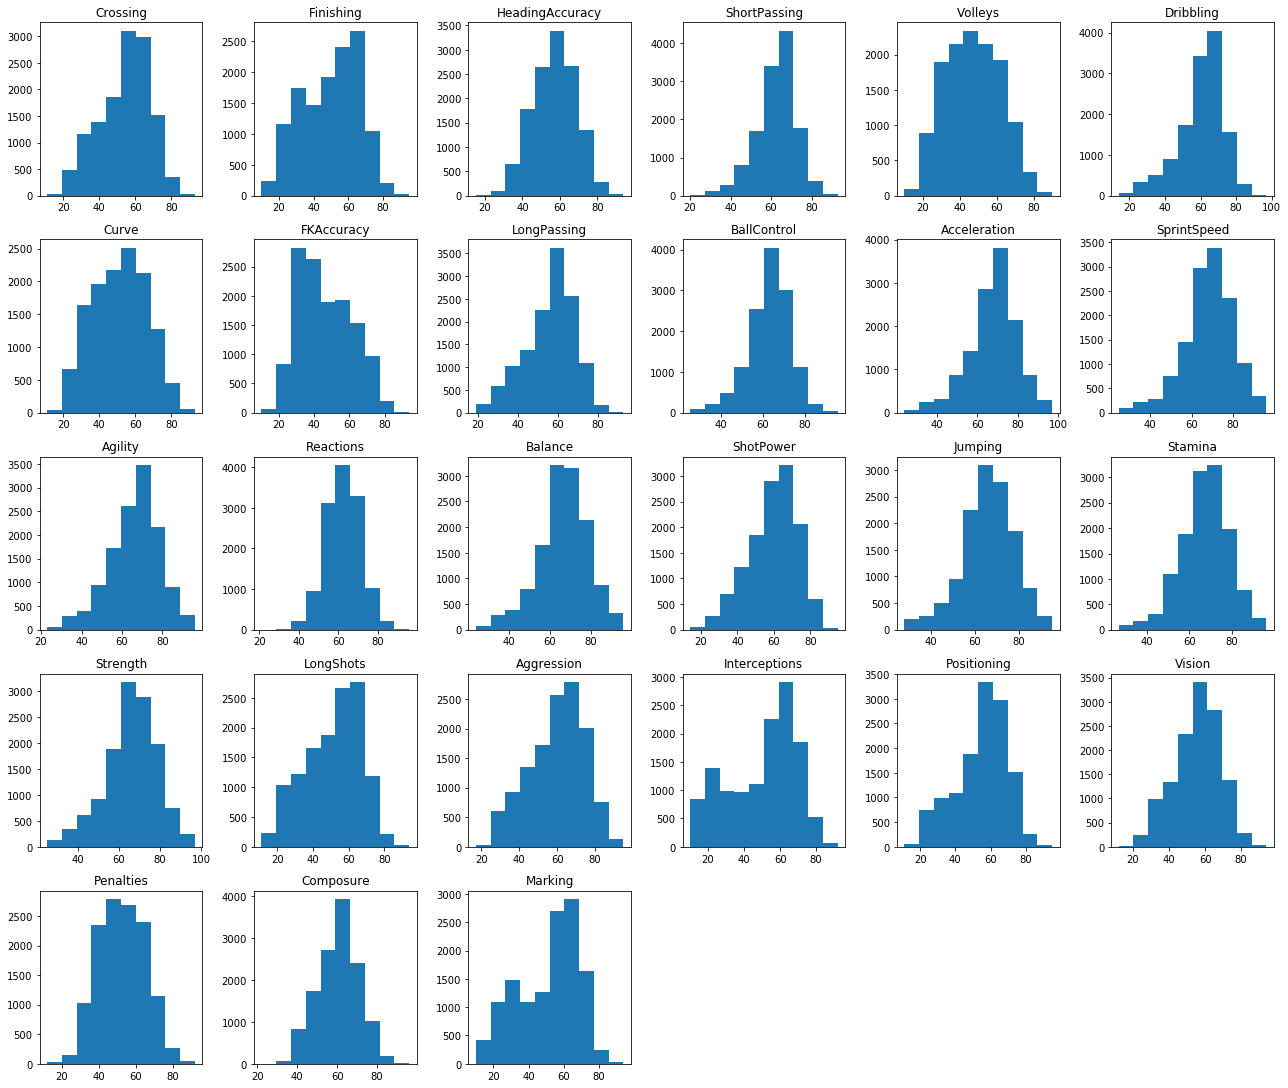

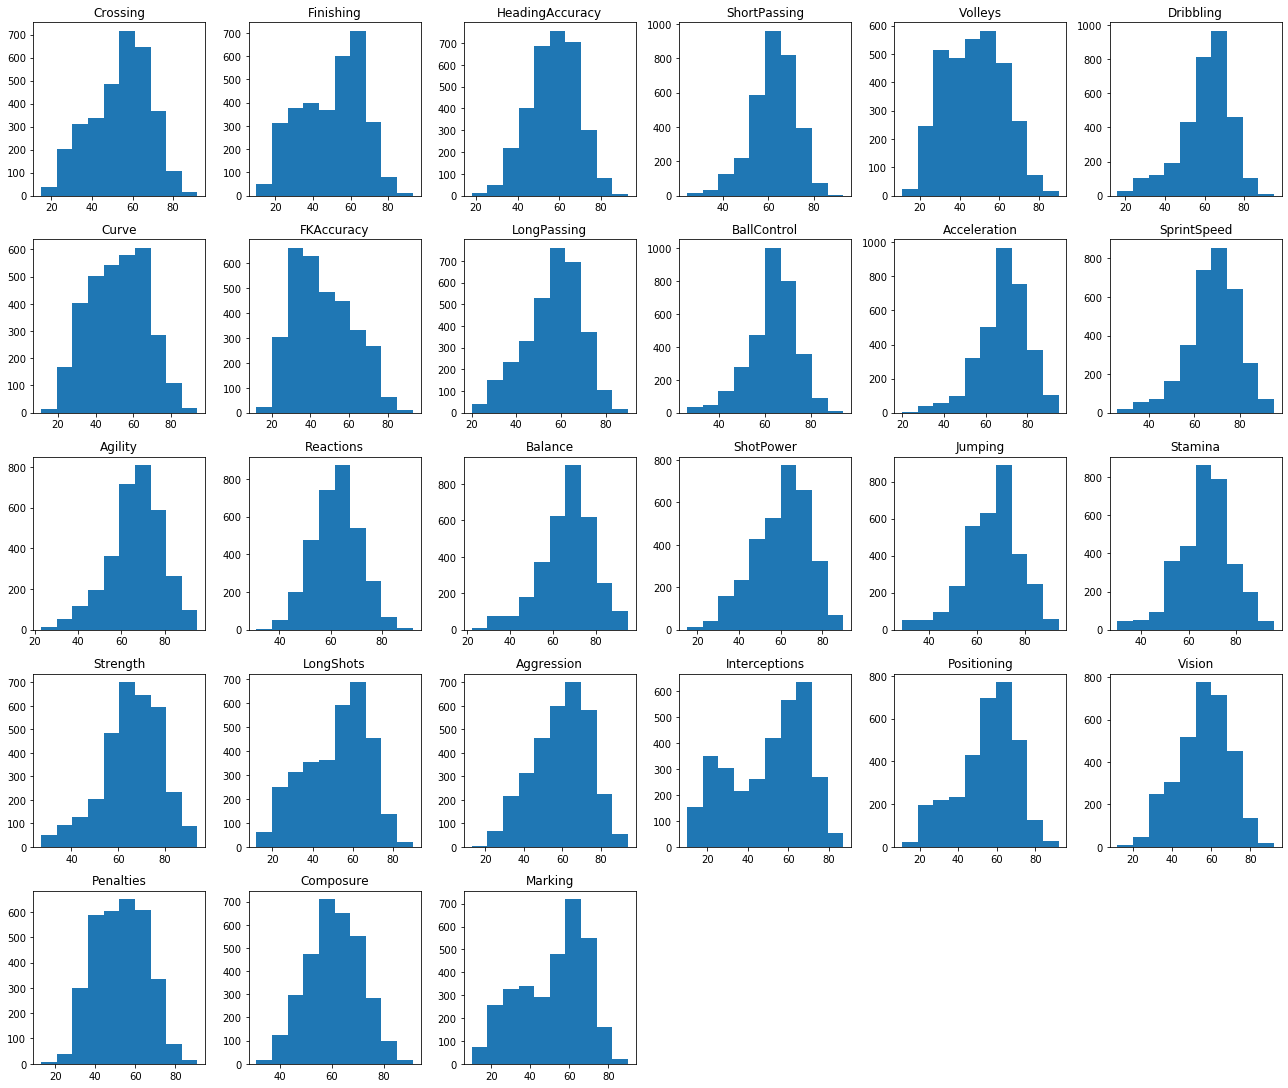

We see very similar distributions. GOOD SPLIT


In [131]:
# answer goes here
model_data = soccer_data.drop(columns = drop_cols, axis=1)

model_data['eliteness'] = np.where(model_data['Overall'] >= 75, 1, 0)
model_data.drop(columns=['Overall'], inplace = True)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(model_data.drop('eliteness', axis=1), model_data['eliteness'], test_size=.2, random_state=1)

import ds_useful

ds_useful.auto_subplots(X_train)
ds_useful.auto_subplots(X_test)
print('We see very similar distributions. GOOD SPLIT')

Fit the logistic regression model using the statsmodels package and print out the coefficient summary. Which variables appear to be the most important, and what effect do they have on the probability of a player being elite?

In [145]:
# answer goes here

from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=10, solver='liblinear')
logit.fit(X_train, y_train)

train_score = logit.score(X_train, y_train)
test_score = logit.score(X_test, y_test)

# print('Train: {:.3f}'.format(train_score))
print('Train', train_score)
print('Test {}'.format(test_score))

coefficient_summary = pd.DataFrame(logit.coef_, columns = X_train.columns)
coefficient_summary.iloc[0]

Train 0.9578196479801504
Test 0.9553488372093023


Crossing          -0.011233
Finishing          0.021570
HeadingAccuracy    0.041277
ShortPassing       0.136098
Volleys           -0.014479
Dribbling         -0.000160
Curve              0.003963
FKAccuracy        -0.002608
LongPassing        0.001782
BallControl        0.150454
Acceleration       0.024751
SprintSpeed        0.031593
Agility           -0.006890
Reactions          0.231558
Balance           -0.036166
ShotPower          0.042219
Jumping            0.004795
Stamina           -0.014930
Strength          -0.006723
LongShots         -0.021437
Aggression         0.009326
Interceptions     -0.012772
Positioning       -0.044254
Vision            -0.024313
Penalties         -0.006951
Composure          0.097120
Marking            0.018012
Name: 0, dtype: float64

We have yet to discuss how to evaluate the model, which will happen next week, but one intuitive way to see if our model predictions are reasonable is to plot a calibration curve. In essence, the probabilities predicted by a good model will match the observed proportions of outcomes (i.e. If we take all of the predictions around 70% made by our model, the corresponding observed outcomes should be Elite about 70% of the time).

First, make predictions on the test set and join them to the corresponding true outcomes. Then, use the *calibration_curve* function in scikit learn to plot a calibration curve. What do you see?

There is some helpful code for creating calibration plots at the link below:
https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py

Automatically created module for IPython interactive environment
Logistic:
	Brier: 0.099
	Precision: 0.872
	Recall: 0.851
	F1: 0.862

Naive Bayes:
	Brier: 0.118
	Precision: 0.857
	Recall: 0.876
	F1: 0.867

Naive Bayes + Isotonic:
	Brier: 0.098
	Precision: 0.883
	Recall: 0.836
	F1: 0.859

Naive Bayes + Sigmoid:
	Brier: 0.109
	Precision: 0.861
	Recall: 0.871
	F1: 0.866

Logistic:
	Brier: 0.099
	Precision: 0.872
	Recall: 0.851
	F1: 0.862

SVC:
	Brier: 0.163
	Precision: 0.872
	Recall: 0.852
	F1: 0.862

SVC + Isotonic:
	Brier: 0.100
	Precision: 0.853
	Recall: 0.878
	F1: 0.865

SVC + Sigmoid:
	Brier: 0.099
	Precision: 0.874
	Recall: 0.849
	F1: 0.861



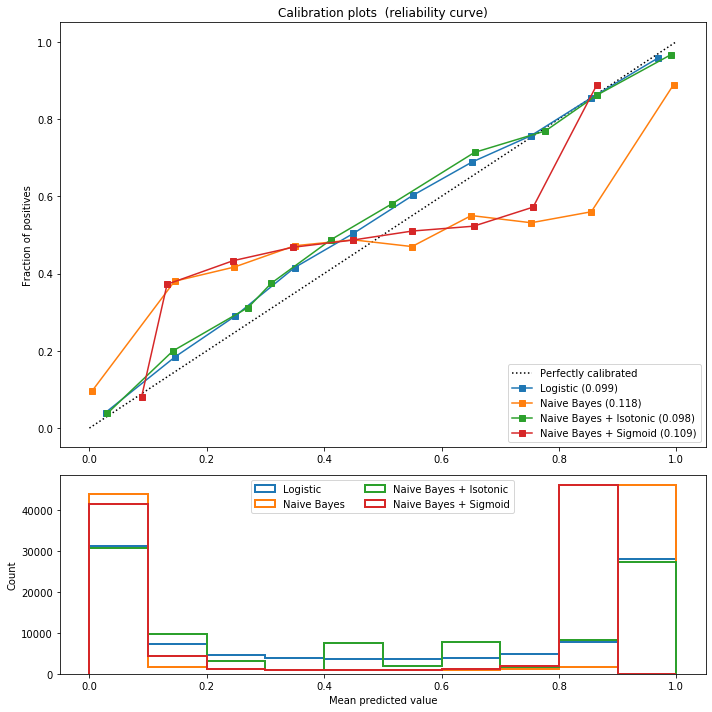

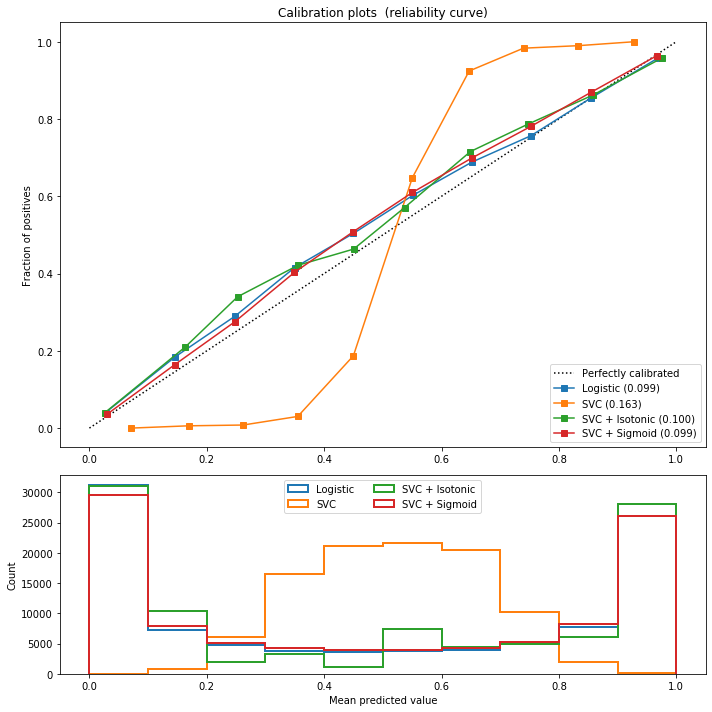

In [150]:
# answer goes here

print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@telecom-paristech.fr>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD Style.

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split


# Create dataset of classification task with many redundant and few
# informative features
X, y = datasets.make_classification(n_samples=100000, n_features=20,
                                    n_informative=2, n_redundant=10,
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99,
                                                    random_state=42)


def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')

    # Logistic regression with no calibration as baseline
    lr = LogisticRegression(C=1.)

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()

# Plot calibration curve for Gaussian Naive Bayes
plot_calibration_curve(GaussianNB(), "Naive Bayes", 1)

# Plot calibration curve for Linear SVC
plot_calibration_curve(LinearSVC(max_iter=10000), "SVC", 2)

plt.show()

We see that the lower predicted probabilities tend to be well calibrated - when the model predicts 20% likelihood of eliteness, for example, we tend to see about 20% in reality, which is a good sign. However, the calibration does falter quite a bit for the more confident predictions; weaker calibration at the extremes is fairly common for probabilistic models, although not always to this extent.